Visualization functions akin to what Sakurajima did last year

Colors (from xkcd colors):
- bluegreen
- coral
- white

In [5]:
import json
import math

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from dataLoader import load_data_event
import modelling

sns.set()

primary_color = sns.xkcd_rgb['bluegreen']
secondary_color = sns.xkcd_rgb['coral']
background_color = sns.xkcd_rgb['white']

In [6]:
event = 'week1/2020ncwak'
qualification_matches, team_scores, team_data, team_component_opr = load_data_event(event)

score_prediction_model = modelling.ScoreModelOpr(
    score_model_file='data/saved_models/v1/score-model.json',
    opr_file='data/saved_models/v1/opr-data.csv',
    team_data_file='data/saved_models/v1/team-data.csv'
)

First, let's implement the functionality from last year.

In [7]:
# get team data
team_key = 'frc5160'
match_scores_played = team_scores.loc[team_scores['team_key'] == team_key]
matches_played = qualification_matches.loc[qualification_matches['match_number'].isin(match_scores_played['match_number'])]
matches_played

,match_key,match_type,match_number,blue_1_key,blue_2_key,blue_3_key,blue_keys,blue_endgame_level,blue_foul_count,blue_points_scored,...,red_3_init_line,red_1_endgame,red_2_endgame,red_3_endgame,red_cells_bottom_auto,red_cells_bottom_teleop,red_cells_outer_auto,red_cells_outer_teleop,red_cells_inner_auto,red_cells_inner_teleop
16,2020ncwak_qm14,qm,14,frc5607,frc5160,frc2642,"[frc5607, frc5160, frc2642]",True,0,27,...,0,5,0,5,0,0,2,1,1,1
20,2020ncwak_qm18,qm,18,frc7671,frc5160,frc7463,"[frc7671, frc5160, frc7463]",False,0,54,...,0,5,5,0,1,1,0,0,0,0
25,2020ncwak_qm22,qm,22,frc7671,frc6500,frc4828,"[frc7671, frc6500, frc4828]",False,0,42,...,0,0,25,25,3,11,0,0,0,0
28,2020ncwak_qm25,qm,25,frc6502,frc7890,frc2642,"[frc6502, frc7890, frc2642]",False,0,86,...,5,25,0,25,3,12,0,0,0,0
33,2020ncwak_qm3,qm,3,frc4828,frc5160,frc6240,"[frc4828, frc5160, frc6240]",True,0,63,...,5,0,5,5,0,0,5,4,0,0
35,2020ncwak_qm31,qm,31,frc5160,frc2059,frc4561,"[frc5160, frc2059, frc4561]",False,0,86,...,0,5,0,5,2,3,0,1,0,0
41,2020ncwak_qm37,qm,37,frc8090,frc435,frc5160,"[frc8090, frc435, frc5160]",True,1,100,...,5,5,5,5,0,3,0,6,0,1
46,2020ncwak_qm41,qm,41,frc6496,frc3229,frc7463,"[frc6496, frc3229, frc7463]",False,1,32,...,5,25,0,5,3,13,0,0,0,0
49,2020ncwak_qm44,qm,44,frc4291,frc7763,frc6502,"[frc4291, frc7763, frc6502]",True,0,106,...,5,25,0,25,2,12,2,9,1,0
56,2020ncwak_qm50,qm,50,frc7763,frc3229,frc6908,"[frc7763, frc3229, frc6908]",True,1,47,...,5,0,5,25,2,10,3,7,0,4


Text(0.5, 1.0, 'Percentile plot of team_score for frc5160')

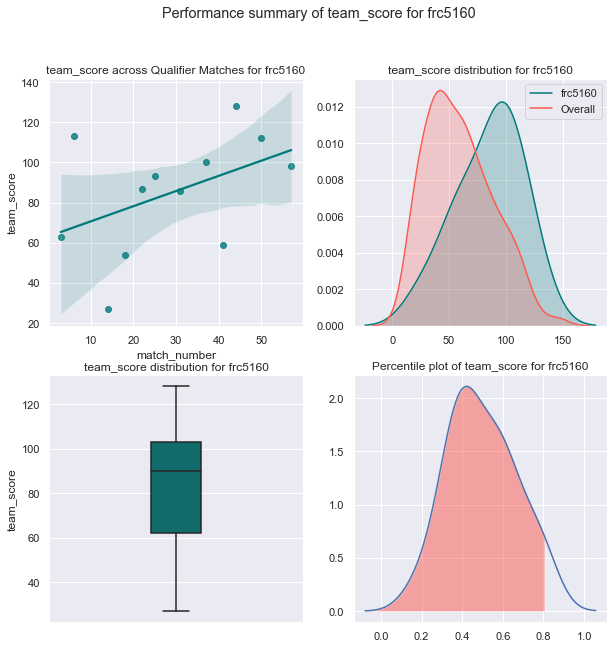

In [8]:
feature = 'team_score'

plt.figure(figsize=(10, 10))
plt.suptitle(f'Performance summary of {feature} for {team_key}')

# team performance across matches
plt.subplot(2, 2, 1)
sns.regplot(x='match_number', y=feature, data=match_scores_played, color=primary_color)
plt.title(f'{feature} across Qualifier Matches for {team_key}')

# "histogram" of scoring metrics
plt.subplot(2, 2, 2)
sns.kdeplot(match_scores_played[feature], shade=True, color=primary_color, label=f'{team_key}')
sns.kdeplot(team_scores[feature], shade=True, color=secondary_color, label='Overall')
plt.title(f'{feature} distribution for {team_key}')

# boxplot of team performance
plt.subplot(2, 2, 3)
sns.boxplot(y=feature, color=primary_color, data=match_scores_played, width=.2)
plt.title(f'{feature} distribution for {team_key}')

# percentile/curve of feature
plt.subplot(2, 2, 4)
event_mean, event_std = np.mean(team_scores[feature]), np.std(team_scores[feature])
team_data_key = 'mean_score' if feature == 'team_score' else f'mean_{feature}'
event_percentiles = stats.norm.cdf((team_data[team_data_key] - event_mean) / event_std)
percentile = stats.norm.cdf((np.mean(match_scores_played[feature]) - event_mean) / event_std)
ax = sns.kdeplot(event_percentiles)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = x < percentile
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=.5, facecolor=secondary_color)
plt.title(f'Percentile plot of {feature} for {team_key}')

With last year's functionality implemented, we can now move on to greater things. How about match predictions?

In [9]:
predictions = score_prediction_model.predict_scores_event(matches_played, feedback=True)
predictions

,match_number,confidence,predicted_victor,actual_victor
0,14,0.85,blue,red
1,18,0.79,blue,blue
2,22,0.81,red,red
3,25,0.58,blue,red
4,3,0.52,blue,blue
5,31,0.96,blue,blue
6,37,0.77,blue,blue
7,41,0.62,red,red
8,44,0.94,red,red
9,50,0.87,red,red


In [10]:
predicted_results_team = []
for _, match in predictions.iterrows():
    qual_match_data = matches_played.loc[matches_played['match_number'] == match['match_number']].iloc[0]
    color = 'red' if team_key in [qual_match_data['red_1_key'], qual_match_data['red_2_key'], qual_match_data['red_3_key']] else 'blue'
    predicted_results_team.append([
        match['match_number'], match['confidence'], 'win' if match['predicted_victor'] == color else 'lose'
    ])
predicted_results_team = pd.DataFrame(predicted_results_team, columns=['match_num', 'confidence', 'predicted_result'])
predicted_results_team.sort_values('match_num')

,match_num,confidence,predicted_result
4,3,0.52,win
11,6,0.90,win
0,14,0.85,win
1,18,0.79,win
2,22,0.81,win
3,25,0.58,lose
5,31,0.96,win
6,37,0.77,win
7,41,0.62,win
8,44,0.94,win
